<a id='title'></a>
# U.S. Medical Insurance Costs Data Analysis and Modeling

<a id='table-of-contents'></a>
# Table of Contents

- [Introduction](#1-introduction)
    - [Problem Statement](#1.1-problem-statement)
    - [Objectives](#1.2-objectives)
        - [Primary Objective](#1.2.1-primary-objective)
        - [Secondary Objectives](#1.2.2-secondary-objectives)
    - [Methodology](#1.3-methodology)
        - [Approach](#1.3.1-approach)
        - [Tools](#1.3.2-tools)
    - [Personal Notes](#1.4-personal-notes)
        - [Challenges](#1.4.1-challenges)
        - [Learning Goals](#1.4.2-learning-goals)
- [Data Collection](#2-data-collection)
- [Data Cleaning](#3-data-cleaning)
    - [Project Setup](#3.1-project-setup)
    - [Dataframe Overview](#3.2-dataframe-overview)
    - [Dataframe Dimensions](#3.3-dataframe-dimensions)
    - [Handling Null Values](#3.4-handling-null-values)
    - [Handling Duplicate Values](#3.5-handling-duplicate-values)
    - [Handling Outliers](#3.6-handling-outliers)
    - [Data Dimensions After Cleaning](#3.7-data-dimensions-after-cleaning)
    - [Saving the Cleaned Dataframe](#3.8-saving-the-cleaned-dataframe)
- [Exploratory Data Analysis](#4-exploratory-data-analysis)
    - [Data Types](#4.1-data-types)
    - [Univariate Analysis](#4.2-univariate-analysis)
        - [Descriptive Statistics](#4.2.1-descriptive-statistics)
            - [Numerical Variables](#4.2.1.1-numerical-variables)
            - [Categorical Variables](#4.2.1.2-categorical-variables)
        - [Histograms and Bar Charts](#4.2.2-histograms-and-bar-charts)
            - [Numerical Variables - Histograms](#4.2.2.1-numerical-variables-histograms)
            - [Categorical Variables - Bar Charts](#4.2.2.2-categorical-variables-bar-charts)
        - [Interpretation for Each Variable](#4.2.3-interpretation-for-each-variable)
    - [Bivariate Analysis](#4.3-bivariate-analysis)
        - [Age versus Charges](#4.3.1-age-versus-charges)
        - [BMI versus Charges](#4.3.2-bmi-versus-charges)
        - [Children versus Charges](#4.3.3-children-versus-charges)
        - [Sex versus Charges](#4.3.4-sex-versus-charges)
        - [Smoker versus Charges](#4.3.5-smoker-versus-charges)
        - [Region versus Charges](#4.3.6-region-versus-charges)
    - [Correlation Analysis](#4.4-correlation-analysis)
        - [Correlation Matrix](#4.4.1-correlation-matrix)
        - [Interpretation](#4.4.2-interpretation)
    - [Summary of Exploratory Data Analysis Findings](#4.5-summary-of-exploratory-data-analysis-findings)

# Introduction

The United States is one of the most expensive countries related to healthcare, with their costs continuously increasing each year. This trend places individuals, communities and the healthcare system from the U.S. in a significant financial pressure.

This project features the use of multiple data science tools and methodologies to analysis, understand and possibly predict what U.S. medical insurance costs.

<a id='1.1-problem-statement'></a>
## Problem Statement

The primary focus for this project is to understand which are the factors that influence medical insurance costs in the U.S. This could provide useful insights that could benefit both stakeholders in the insurance business and individual consumers.

<a id='1.2-objectives'></a>
## Objectives

<a id='1.2.1-primary-objective'></a>
### Primary Objective

Identify the key variable which have the most weight on the medical insurance costs.

<a id='1.2.2-secondary-objectives'></a>
### Secondary Objectives

* Explore multiple data science tools and methodologies.
* Understand how multiple lifestyle choices impact medical insurance costs.

<a id='1.3-methodology'></a>
## Methodology

<a id='1.3.1-data-collection'></a>
### Approach

This project will employ multiple statistical tests to create and validate hypotheses, following with machine learning models to make predictions.

<a id='1.3.2-data-sources'></a>
### Tools

| Tool             | Use                            |
|------------------|--------------------------------|
| Python           | Primary programming language   |
| Jupyter Notebook | Primary IDE                    |
| pandas           | Data manipulation and analysis |
| numpy            | Data manipulation and analysis |
| matplotlib       | Data visualization             |
| seaborn          | Data visualization             |

<a id='1.4-personal-notes'></a>
## Personal Notes

> This project was originally planned to be only an Exploratory Data Analysis to experiment with different tools.
> I'm glad that it has turned into a full project, as it is a great learning opportunity and a way to showcase my skills.
> When I started this project, I had no idea what the dataset was even about, since it was provided by Codecademy.
> When researching about the origins of the dataset, I found out that it was originally part of an R learning course and book.
> I wish to further explore this dataset and the other datasets provided by the author of the book, Brett Lantz.

<a id='1.4.1-lessons-learned'></a>
### Challenges

* This is intended to be a "growing" project. While it won't be updated regularly post-completion, any critical improvements or updates deemed necessary will be implemented during the project phase.
* This is my first experience working with Git branches, which presents a learning curve for managing different versions of the project effectively.

<a id='1.4.2-learning-goals'></a>
### Learning goals

* Enhance my skills in data analysis, focusing on the variables and objectives specified by the project description.
* Learn the basics of Git branching to manage different stages and updates of this project effectively. This aligns with the challenge of using Git repositories for the first time and will be an invaluable skill for future projects. This will mostly be done using GitHub.

<a id='2-data-collection'></a>
# Data Collection

The dataset is stored in a `.csv` file. 
This dataset can be found, along with other datasets, [here](https://github.com/stedy/Machine-Learning-with-R-datasets).

Originally, this dataset is used for a prediction analysis, provided by the author, Brett Lantz.
In [kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance), the following quote is provided:

> Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. 
> As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create 
> a user account which can be a problem if you are checking the book out from the library or borrowing the book from 
> a friend.
> All of these datasets are in the public domain
> but simply needed some cleaning up and recoding to match the format in the book.

<a id='3-data-cleaning'></a>
# Data Cleaning

<a id='3.1-project-setup'></a>
## Project Setup

The next code cell imports the necessary libraries and loads the dataset into a `pandas` DataFrame.
This cell *must* be run before any other code cell in this notebook.
If this cell displays "`The source file was not found`", please check the path to the source file and try again.

In [83]:
# WARNING: This cell *needs* to be run *first* for the rest of the notebook to work.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

# Define the paths to the data files
data_path = '../data'
raw_data_path = data_path + '/raw'
processed_data_path = data_path + '/processed'

# Define the path to the source file
source_file_path = raw_data_path + '/raw.csv'

# Initialize the dataframe
main_df = None

# Load the source file into a dataframe
print(f'-- Dataframe --')
try:
    # Load the source file into a dataframe
    main_df = pd.read_csv(source_file_path)
except FileNotFoundError:
    # Display an error message if the source file was not found
    print('The source file was not found')
else:
    # Display a success message if the source file was loaded successfully
    print(f'Dataframe loaded: {main_df.shape[0]} rows and {main_df.shape[1]} columns.')
print()
    
# Library versions
print(f'-- Versions --')
print(f'Pandas version: {pd.__version__}')
print(f'Matplotlib version: {plt.matplotlib.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'Seaborn version: {sns.__version__}')
print(f'Scipi version: {scipy.__version__}')

-- Dataframe --
Dataframe loaded: 1338 rows and 7 columns.

-- Versions --
Pandas version: 2.1.1
Matplotlib version: 3.8.0
Numpy version: 1.26.0
Seaborn version: 0.12.2
Scipi version: 1.11.2


<a id='3.2-dataframe-overview'></a>
## Dataframe Overview

Before diving into an analysis of the data, it's important to get an initial feel for the data. This gives an idea of what the data looks like.

In [84]:
# Display the first five rows of the dataframe
print(main_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [85]:
# Display the last five rows of the dataframe
print(main_df.tail())

      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


At first glance, the dataset seems to be fairly clean. There are no obvious issues and the values are all within a reasonable range.

<a id='3.3-dataframe-dimensions'></a>
## Dataframe Dimensions

Knowing the shape of the dataset helps to understand the size. This is important for understanding the usage of computational resources.

In [86]:
# Display the dimensions of the dataframe
print(f'Columns: {main_df.shape[1]}')
print(f'Rows: {main_df.shape[0]}')

Columns: 7
Rows: 1338


The dataframe consists of 1338 rows and seven columns. This is a fairly small dataset, which means that it can be easily manipulated and analyzed.

#<a id='3.4-handling-null-values'></a>
## Handling Null Values

Null values can cause data analysis and models to misbehave. It’s important to know if there are any null values in the dataset and how to handle them.

In [87]:
# Display the number of null values in the dataframe
for column in main_df.columns:
    print(f'Column: "{column}" has "{main_df[column].isnull().sum()}" null values.')

Column: "age" has "0" null values.
Column: "sex" has "0" null values.
Column: "bmi" has "0" null values.
Column: "children" has "0" null values.
Column: "smoker" has "0" null values.
Column: "region" has "0" null values.
Column: "charges" has "0" null values.


There are no null values in the dataset. This is good news, as it means that there is no need to handle null values.

<a id='3.5-handling-duplicate-values'></a>
## Handling Duplicate values

Duplicate entries mess with the data, as they skew the results. It’s important to know if there are any duplicate values in the dataset and how to handle them.

In [88]:
# Display the number of duplicate values in the dataframe
print(f'There are "{main_df.duplicated().sum()}" duplicate values in the dataframe.')

There are "1" duplicate values in the dataframe.


There is a single duplicate value in the dataset. Before removing it, it may be useful to know which row is duplicated.

In [89]:
# Display the duplicated row
print(main_df[main_df.duplicated()])

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


This duplicate could be useful information. Since there are no names or IDs in the dataset, the only clue present to show that this is a duplicate is the charges value. This value is too specific to be a coincidence. For this reason, the duplicate value will be removed and only the first instance will be kept.

In [90]:
# Remove the duplicate value
main_df.drop_duplicates(inplace=True)

<a id='3.7-handling-outliers'></a>
## Handling Outliers

For this project, outliers won't be removed. This is because the dataset is too small to remove any values. Removing outliers would reduce the size of the dataset by a significant amount, which would make it difficult to analyze. Outliers will be explored in the exploratory data analysis section if deemed necessary or useful.

<a id='3.6-data-dimensions-after-cleaning'></a>
## Data Dimensions After Cleaning

After cleaning the dataset, it's important to check the dimensions again. This will help determine if the cleaning process was successful. In this instance, the number of rows should be reduced by one.

In [91]:
# Display the dimensions of the dataframe
print(f'Columns: {main_df.shape[1]}')
print(f'Rows: {main_df.shape[0]}')

Columns: 7
Rows: 1337


The number of rows has been reduced by one, which means that the duplicate value was successfully removed.

<a id='3.7-saving-the-cleaned-dataframe'></a>
## Saving the Cleaned Dataframe

Before proceeding with any analysis, it's important to save the cleaned data into a new `.csv` file. This could help other people to use the data that's being analyzed.

In [92]:
# Define where the processed data will be saved
destination_file_path = processed_data_path + '/processed.csv'

# Save the dataframe into a new csv file
main_df.to_csv(destination_file_path, index=False)

<a id='4-exploratory-data-analysis'></a>
# Exploratory Data Analysis

The Exploratory Data Analysis (EDA) is one of the main parts of this project. This section aims to deep dive into the data and extract useful information, presenting a comprehensive understanding of its structure, relationships, and patterns. The EDA will be broken down into the following sections:

* [Data Types](#4.1-data-types)
* [Univariate Analysis](#4.2-univariate-analysis)
* [Bivariate Analysis](#4.3-bivariate-analysis)
* [Correlation Analysis](#4.4-correlation-analysis)
* [Summary of Exploratory Data Analysis Findings](#4.5-summary-of-exploratory-data-analysis-findings)

<a id='4.1-data-types'></a>
## Data Types

This short section explores the dataset's data types. This is a crucial step to determine which kind of analysis can be performed on the data.

In [93]:
# Display the data types of the dataframe
for column in main_df.columns:
    print(f'Column: "{column}" has data type "{main_df[column].dtype}".')

Column: "age" has data type "int64".
Column: "sex" has data type "object".
Column: "bmi" has data type "float64".
Column: "children" has data type "int64".
Column: "smoker" has data type "object".
Column: "region" has data type "object".
Column: "charges" has data type "float64".


The data types are as expected. There are four numerical variables and three categorical variables:

Numerical variables: `age`, `bmi`, `children`, `charges`
- The numerical variables will be analyzed using descriptive statistics and histograms. Box plots will also be used to determine if there are any outliers in the data if the descriptive statistics and histograms show that there is a high variability in the data.

Categorical variables: `sex`, `smoker`, `region`.
- The categorical variables will be analyzed using bar charts. Additionally, if the categorical variables are ordinal, then they will be analyzed using descriptive statistics.

_Note: This next code cell is used to store the variables into two sets, one for numerical variables and one for categorical variables. This will be useful for the next sections._

In [94]:
# Store the numerical variables into a list
numerical_fields = main_df.select_dtypes(include=['int64', 'float64']).columns

# Store the categorical variables into a list
categorical_fields = main_df.select_dtypes(include=['object']).columns

<a id='4.2-univariate-analysis'></a>
## Univariate Analysis

This section consists of multiple analysis for each variable in the dataset. The analysis will be performed using descriptive statistics, histograms, and box plots. 

<a id='4.2.1-descriptive-statistics'></a>
### Descriptive Statistics

Standard descriptive statistics will give a good idea for the dataset and help create early hypotheses or assumptions about the data. These statistics will be obtained using the `describe()` method from `pandas`.

<a id='4.2.1.1-numerical-variables'></a>
#### Numerical Variables

In [95]:
# Obtain the descriptive statistics for the numerical variables
numerical_description = main_df[numerical_fields].describe()

# Display the descriptive statistics
print(numerical_description)

               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


In early analysis, the numerical variables seem to have multiple standing out values. The standard deviation is high for all variables, which means there is a high variability in the data. This could be due to outliers, which will be explored later on.

<a id='4.2.1.2-categorical-variables'></a>
#### Categorical Variables

In [96]:
# Obtain the descriptive statistics for the categorical variables
categorical_description = main_df[categorical_fields].describe()

# Display the descriptive statistics
print(categorical_description)

         sex smoker     region
count   1337   1337       1337
unique     2      2          4
top     male     no  southeast
freq     675   1063        364


Although its good practice to obtain the descriptive statistics for all variables, these results show that the categorical description is very limited. The most that can be obtained from this is the high frequency of `no` in the `smoker` variable. This could be useful for further analysis. To further learn about the categorical variables, the frequency of each value will be obtained and displayed, along with the percentage of each value and the mode.

In [97]:
# For each variable show, the total amount of times each value appears, percentage and determine the mode
for variable in categorical_fields:
    # Variable name
    print(f'Variable "{variable}":')
    
    # For each value, show the quantity and percentage
    for value in main_df[variable].unique():
        quantity = main_df[variable].value_counts()[value]
        percentage = round(main_df[variable].value_counts(normalize=True)[value] * 100, 2)
        print(f'"{value}": {quantity} ({percentage}%)')
        
    # Show the mode
    print(f'Mode: "{main_df[variable].mode()[0]}"\n')

Variable "sex":
"female": 662 (49.51%)
"male": 675 (50.49%)
Mode: "male"

Variable "smoker":
"yes": 274 (20.49%)
"no": 1063 (79.51%)
Mode: "no"

Variable "region":
"southwest": 325 (24.31%)
"southeast": 364 (27.23%)
"northwest": 324 (24.23%)
"northeast": 324 (24.23%)
Mode: "southeast"


This once again shows that the `smoker` variable has a high frequency of `no`. The other variables have a more even distribution of values.

<a id='4.2.2-histograms-and-bar-charts'></a>
### Histograms and Bar Charts

Histograms are a great way to visualize the distribution of the data. This is useful to determine if the data is normally distributed or skewed.

<a id='4.2.2.1-numerical-variables-histograms'></a>
#### Numerical Variables - Histograms

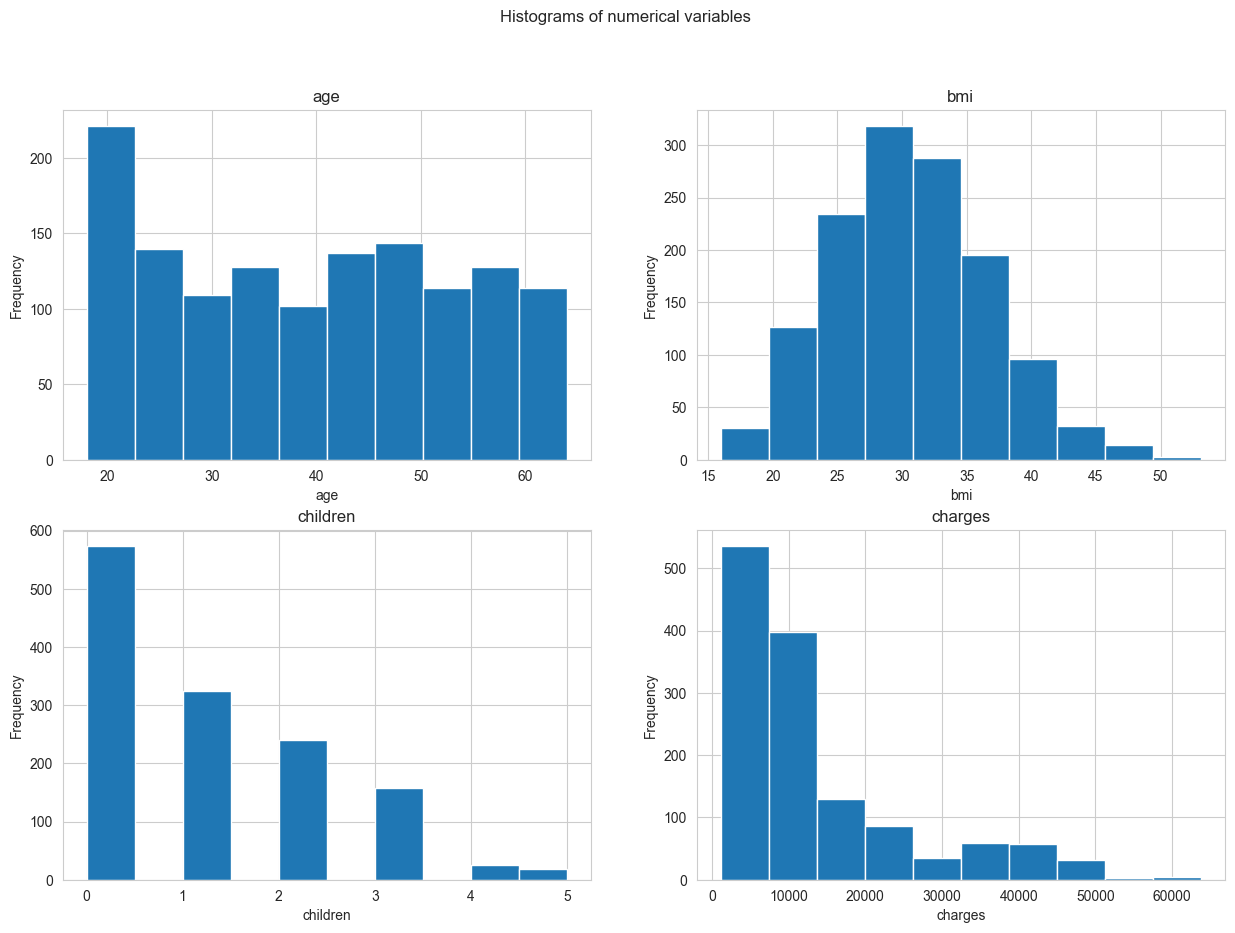

In [98]:
# Create a figure with subplots
figure, axes = plt.subplots(2, 2, figsize=(15, 10))
figure.suptitle('Histograms of numerical variables')
axes = axes.flatten()

# Create a histogram for each of the numerical variables
for n, field in enumerate(numerical_fields):
    axes[n].hist(main_df[field])
    axes[n].set_title(field)
    axes[n].set_xlabel(field)
    axes[n].set_ylabel('Frequency')
    
# Display the figure
plt.show()

<a id='4.2.2.2-categorical-variables-bar-charts'></a>
#### Categorical Variables - Bar Charts

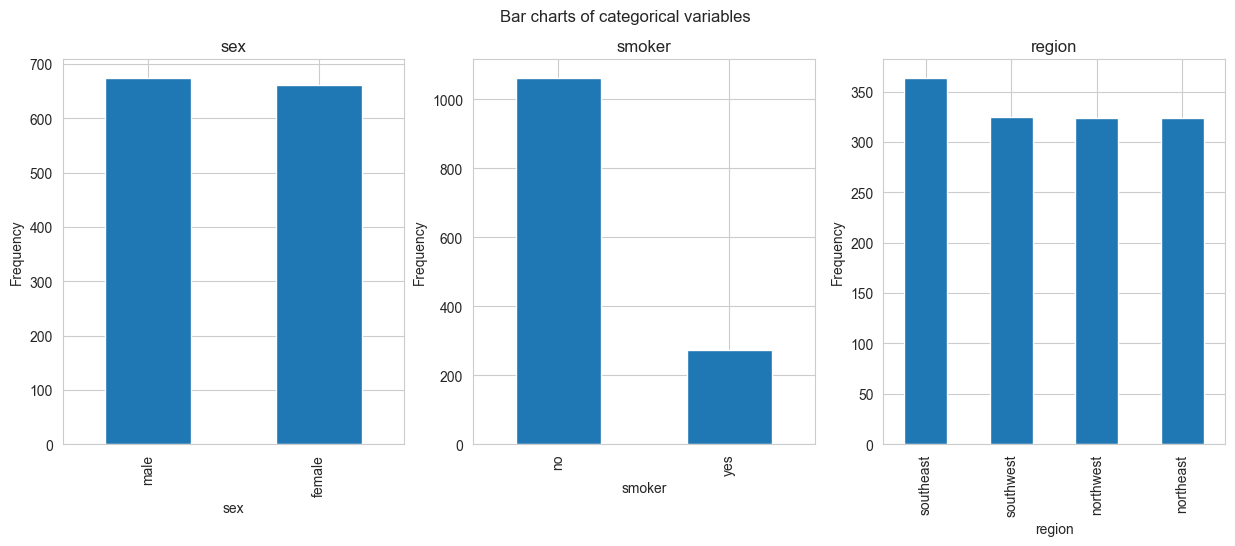

In [99]:
# Create a figure with subplots
figure, axes = plt.subplots(1, 3, figsize=(15, 5))
figure.suptitle('Bar charts of categorical variables')
axes = axes.flatten()

# Create a bar chart for each of the categorical variables
for n, field in enumerate(categorical_fields):
    main_df[field].value_counts().plot(kind='bar', ax=axes[n])
    axes[n].set_title(field)
    axes[n].set_xlabel(field)
    axes[n].set_ylabel('Frequency')
    
# Display the figure
plt.show()

<a id='4.2.3-interpretation-for-each-variable'></a>
### Interpretation for Each Variable

This section covers the interpretation of the information obtained from the descriptive statistics, histograms, and bar charts for each variable.

<a id='4.2.3.1-age'></a>
#### Age

The `age` of the patients is fairly evenly distributed, with a slight skew towards the younger ages in the 20s group. The mean age is 39 years old, with a standard deviation of 14 years. The youngest patient is 18 years old, and the oldest patient is 64 years old. The high standard deviation indicates that the data is spread out over a wide range of values, which can indicate that the age of the patients is not a good indicator of the insurance costs.

<a id='4.2.3.2-bmi'></a>
#### BMI

The histogram for `bmi` shows that the distribution is normal with a bell curve skewed to the right. The mean 30.66, with a standard deviation of 6.1, indicates a moderate variability. The range goes from 15.96 to 53.13. A BMI of 30 and above is normally falls under the category of obesity. Since the `bmi` values tend to be around the mean, this could potentially mean that it has an impact on insurance costs. The histogram also shows that there could be presence of outliers, creating a box plot will help to visualize this.


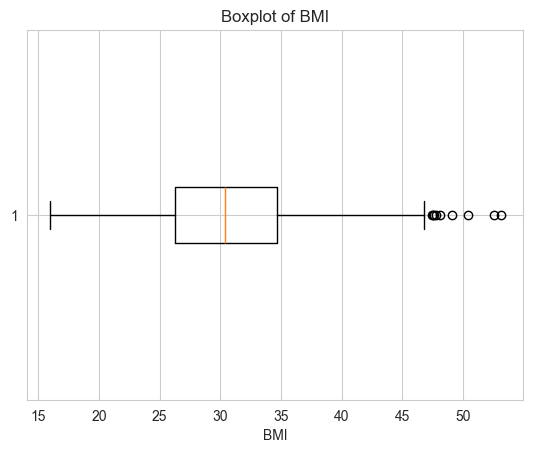

In [100]:
# Create a boxplot for the BMI variable
plt.boxplot(main_df['bmi'], vert=False)
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()

Although the boxplot shows that there are outliers, the number looks to be small, but determining the amount may help to clarify this. First, the interquartile range will be calculated and using the upper and lower bounds, the outliers will be removed into a new dataframe.

In [101]:
# Calculate the interquartile range
bmi_iqr = main_df['bmi'].quantile(0.75) - main_df['bmi'].quantile(0.25)

# Calculate the upper and lower bounds
bmi_upper_bound = main_df['bmi'].quantile(0.75) + 1.5 * bmi_iqr
bmi_lower_bound = main_df['bmi'].quantile(0.25) - 1.5 * bmi_iqr

# Create a dataframe without the outliers
main_df_no_outliers = main_df[(main_df['bmi'] < bmi_upper_bound) & (main_df['bmi'] > bmi_lower_bound)]

# Calculate removed rows
percentage_removed = round((1 - main_df_no_outliers.shape[0] / main_df.shape[0]) * 100, 2)
quantity_removed = main_df.shape[0] - main_df_no_outliers.shape[0]

# Display the results
print(f'Number of rows in the original dataframe: {main_df.shape[0]}')
print(f'Number of rows in the new dataframe: {main_df_no_outliers.shape[0]}')
print(f'Percentage of rows removed: {percentage_removed}% ({quantity_removed} rows).')

Number of rows in the original dataframe: 1337
Number of rows in the new dataframe: 1328
Percentage of rows removed: 0.67% (9 rows).


The new dataframe has 1328 rows, which means that nine rows were removed. This number of rows represents 0.67% of the original dataset. This is a very small amount of data. For this reason, the outliers will be kept in the dataset, although further analysis could prove useful, but this is outside the scope of this project.

<a id='4.2.3.3-children'></a>
#### Children

There are larger numbers of patients without children. The histogram is skewed to the right, with a mean of 1.09 and a standard deviation of 1.20, meaning a high variation for the min and max values of 0 and 5 respectively. This variable could potentially have an impact on the insurance costs, although the standard deviation indicates that it may not be a good indicator.

<a id='4.2.3.4-charges'></a>
#### Charges

This variable is the most important one, as it is the one that will be predicted, so it's important to understand it thoroughly.

The charges histogram is skewed to the right, with a mean of 13279.12 and a standard deviation of 12110.35. The range goes from 1121.87 to 63770.42. This indicates a high variability in the data, which could mean that this variable is a good indicator of the insurance costs. It's worth noting that the minimum value is very low compared to the maximum value, which could indicate that there are outliers in the data. To visualize this, a boxplot will be created in the next section.

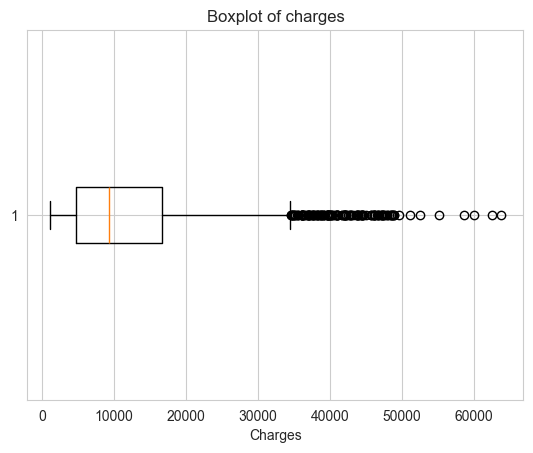

In [102]:
# Create a boxplot for the charges variable
plt.boxplot(main_df['charges'], vert=False)
plt.title('Boxplot of charges')
plt.xlabel('Charges')
plt.show()

The box plot shows that there are outliers in the data. Determining how many outliers there are could help to better understand the data. First, the interquartile range will be calculated and using the upper and lower bounds, the outliers will be removed into a new dataframe.

In [103]:
# Calculate the interquartile range
charges_iqr = main_df['charges'].quantile(0.75) - main_df['charges'].quantile(0.25)

# Calculate the upper and lower bounds
charges_upper_bound = main_df['charges'].quantile(0.75) + 1.5 * charges_iqr
charges_lower_bound = main_df['charges'].quantile(0.25) - 1.5 * charges_iqr

# Create a dataframe without the outliers
main_df_no_outliers = main_df[(main_df['charges'] < charges_upper_bound) & (main_df['charges'] > charges_lower_bound)]

# Calculate removed rows
percentage_removed = round((1 - main_df_no_outliers.shape[0] / main_df.shape[0]) * 100, 2)
quantity_removed = main_df.shape[0] - main_df_no_outliers.shape[0]

# Display the results
print(f'Number of rows in the original dataframe: {main_df.shape[0]}')
print(f'Number of rows in the new dataframe: {main_df_no_outliers.shape[0]}')
print(f'Percentage of rows removed: {percentage_removed}% ({quantity_removed} rows).')

Number of rows in the original dataframe: 1337
Number of rows in the new dataframe: 1198
Percentage of rows removed: 10.4% (139 rows).


The new dataframe has 1198 rows, which means that 139 rows were removed. This number of rows represents 10.4 of the original dataset. This is a significant amount of data. Further analysis of the outliers could help determine if they should be removed or not (or if a portion of them should be removed), although this is, yet again, outside the scope of this project. For this reason, the outliers will be kept in the dataset.

<a id='4.2.3.5-sex'></a>
#### Sex

The values of the `sex` variable show that each value appears roughly fifty percent of the time. This means that the data is evenly distributed between these two values. The frequency of each value is 675 for `male` and 662 for `female`. The mode is `male`, which means that the most common value is `male`, although the difference is very small with a difference of 14 values (0.98%), meaning that the `sex` could have little to no weight in the insurance costs.

<a id='4.2.3.6-smoker'></a>
#### Smoker

The `smoker` variable presents a bigger difference between the values with 1063 (79.51%) for `no` and 274 (20.49%) for `yes`. The mode is `no`, which means that the most common value is `no`. This difference may mean that the `smoker`variable could have a big impact on the insurance costs.

<a id='4.2.3.7-region'></a>
#### Region

The distribution of the values for the `region` variable is fairly even, except for the `southeast` region, which has 364 (27.23%) values, which makes it the most common value. This mode could mean that the `region` variable could have an impact on the insurance costs.

<a id='4.3-bivariate-analysis'></a>
## Bivariate Analysis


This section will cover a bivariate analysis, focusing primarily on the "`charges` versus all" relationships. To determine which of the variables affect the `charges` variable, the following relationships will be analyzed:

| Variable   | Relationship                |
|------------|-----------------------------|
| `age`      | `charges` versus `age`      |
| `bmi`      | `charges` versus `bmi`      |
| `children` | `charges` versus `children` |
| `sex`      | `charges` versus `sex`      |
| `smoker`   | `charges` versus `smoker`   |
| `region`   | `charges` versus `region`   |

The relationships will be analyzed using plots, and the strength of the relationship will be determined using the Pearson correlation analysis for the numerical variables and the chi-square test for the categorical variables. The strength of the relationship will be determined using the following table:

| Correlation | Strength of relationship |
|-------------|--------------------------|
| 0.00 - 0.19 | Very weak                |
| 0.20 - 0.39 | Weak                     |
| 0.40 - 0.59 | Moderate                 |
| 0.60 - 0.79 | Strong                   |
| 0.80 - 1.00 | Very strong              |

The numerical variables will be analyzed using scatter plots, and the categorical variables will be analyzed using box plots.
Unlike the previous section, the analysis of each variable will be done individually instead of creating the plots and then analyzing them.

Additionally, the information obtained in the previous section ([Univariate Analysis](#4.2-univariate-analysis)) will be taken into account when analyzing the relationships.

<a id='4.3.1-age-versus-charges'></a>
### Age versus Charges

<a id='4.3.1.1-scatter-plot'></a>
#### Scatter Plot

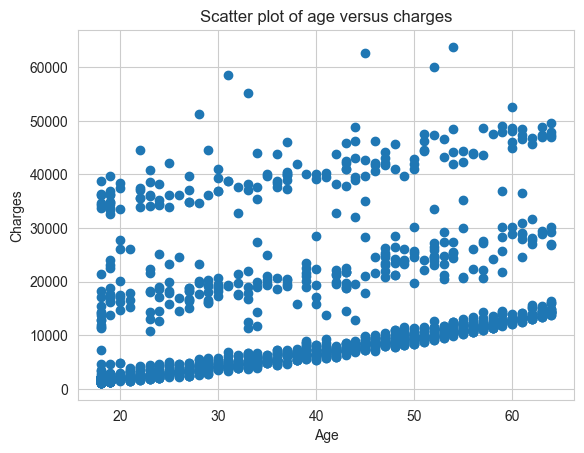

In [104]:
# Create a scatter plot for charges versus age
plt.scatter(main_df['age'], main_df['charges'])
plt.title('Scatter plot of age versus charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

<a id='4.3.1.2-correlation-coefficient'></a>
#### Correlation Coefficient

In [105]:
# Determine the correlation between the charges and age variables
correlation = main_df['charges'].corr(main_df['age'])
print(f'Correlation between charges and age: {round(correlation, 2)}')

Correlation between charges and age: 0.3


<a id='4.3.1.3-interpretation'></a>
#### Interpretation

The scatter plot of `charges` versus `age` shows that a small relationship between the two variables could exist. The presence of outliers is also visible towards the higher values of the `charges` variable, from 50000 and above. The charges are divided between three groups or clusters in all age groups. These groups are as follows:

Note: These are aproximate values, as the clusters are not clearly defined.
- Group 1: From 1000 to 15000.
- Group 2: From 11000 to 29000.
- Group 3: From 32000 to 50000.

These curves lead to the conclusion that the `age` variable could have an impact on the `charges` variable, but another variable could be affecting the `charges` variable, which should explain the cause of the groups.

The high standard deviation found in the univariate analysis for the `age` variable can be appreciated in this scatter plot, since the data points are spread out over all the ages.

Finally, a 0.3 correlation between the `charges` and `age` variables indicates a weak relationship between the two variables.

<a id='4.3.2.1-bmi-versus-charges'></a>
### BMI versus Charges

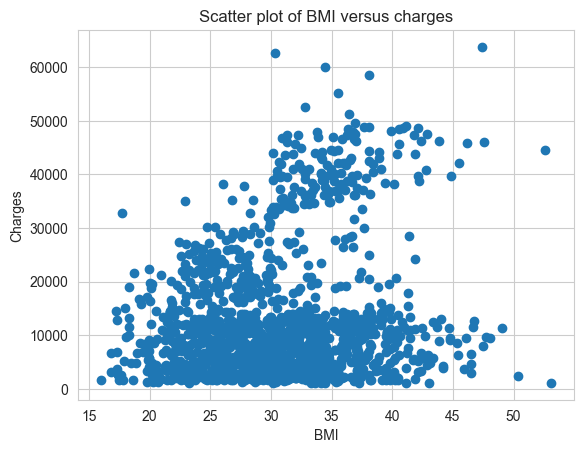

In [106]:
# Create a scatter plot for charges versus bmi
plt.scatter(main_df['bmi'], main_df['charges'])
plt.title('Scatter plot of BMI versus charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

<a id='4.3.2.2-correlation-coefficient'></a>
#### Correlation Coefficient

In [107]:
# Determine the correlation between the charges and bmi variables
correlation = main_df['charges'].corr(main_df['bmi'])
print(f'Correlation between charges and bmi: {round(correlation, 2)}')

Correlation between charges and bmi: 0.2


<a id='4.3.2.3-interpretation'></a>
#### Interpretation

The scatter plot of `charges` versus `bmi` shows that a relationship between the two variables could exist. There are two principal clusters of data points, one with a lower `bmi` and `charges` value and another with a higher `bmi` and `charges` value. Most of the data points seem to be centered around the 25-30 `bmi` range, with values between 1000 and 15000. Yet again, the high standard deviation found in the univariate analysis for the `bmi` variable can be appreciated in this scatter plot, since the data points are spread out over all the `bmi` values.

A correlation of 0.2 makes it a weak relationship.

<a id='4.3.3-children-versus-charges'></a>
### Children versus Charges

<a id='4.3.3.1-box-plot'></a>
#### Box Plot

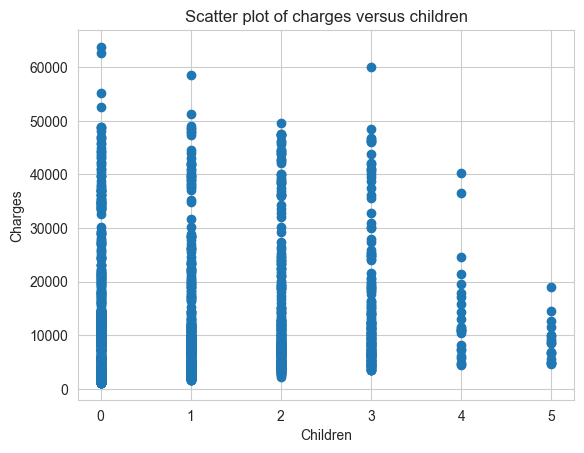

In [108]:
# Create a scatter plot for charges versus children
plt.scatter(main_df['children'], main_df['charges'])
plt.title('Scatter plot of charges versus children')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()

<a id='4.3.3.2-correlation-coefficient'></a>
#### Correlation Coefficient

In [109]:
# Determine the correlation between the charges and children variables
correlation = main_df['charges'].corr(main_df['children'])
print(f'Correlation between charges and children: {round(correlation, 2)}')

Correlation between charges and children: 0.07


<a id='4.3.3.3-interpretation'></a>
#### Interpretation

This plot shows that the `children` variable could be related to the `charges` variable, since the value of the `charges` decreases as the number of kids increases, except for two outliers in the four children group. The `charges` seem to be evenly even distributed from the zero to three children groups. It's also worth noting that the concentration of data points also decreases as the number of children increases. The standard deviation for the `children`variable, which is 1.09, make it a good indicator that this could be one of the worst variables to predict the `charges` variable. This can be further confirmed by the correlation of 0.07, which indicates a very weak relationship.

<a id='4.3.4-sex-versus-charges'></a>
### Sex versus charges

<a id='4.3.4.1-box-plot'></a>
#### Box Plot

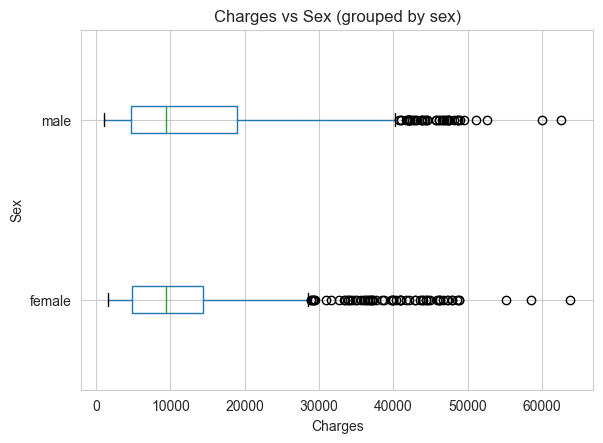

In [110]:
# Create a box plot for each unique value of 'sex' versus 'charges'
main_df.boxplot(column='charges', by='sex', vert=False)
plt.suptitle('') # Remove the default title
plt.title('Charges vs Sex (grouped by sex)')
plt.xlabel('Charges')
plt.ylabel('Sex')
plt.show()

<a id='4.3.4.2-correlation-coefficient'></a>
#### Correlation Coefficient

In [111]:
# Determine the correlation between the charges and sex
correlation = main_df['charges'].corr(main_df['sex'].map({'male': 1, 'female': 0}), method='spearman')
print(f'Correlation between charges and smoker: {round(correlation, 2)}')

Correlation between charges and smoker: 0.01


<a id='4.3.5.3-interpretation'></a>
#### Interpretation

The `charges` for the `male` and `female` values are fairly similar, with the `male` containing slightly higher values in the outliers. Additionally, the 75th percentile (Q3 or upper quartile) of the `male` values is higher than the `female` values by at least 5000. This indicates a posible relation between the variables, but it could be moderate. The correlation of 0.01 indicates a very weak relationship between the two variables.

<a id='4.3.5-smoker-versus-charges'></a>
### Smoker versus Charges

<a id='4.3.5.1-box-plot'></a>
#### Box Plot

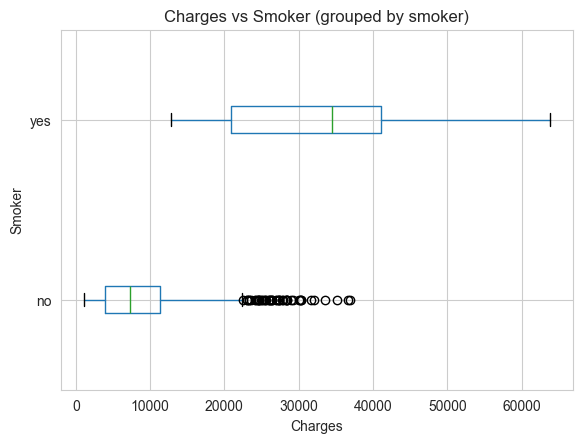

In [112]:
# Create a box plot for each unique value of 'smoker' versus 'charges'
main_df.boxplot(column='charges', by='smoker', vert=False)
plt.suptitle('') # Remove the default title
plt.title('Charges vs Smoker (grouped by smoker)')
plt.xlabel('Charges')
plt.ylabel('Smoker')
plt.show()

<a id='4.3.5.2-correlation-coefficient'></a>
#### Correlation Coefficient

In [113]:
# Determine the correlation between the charges and smoker variables
correlation = main_df['charges'].corr(main_df['smoker'].map({'yes': 1, 'no': 0}), method='spearman')
print(f'Correlation between charges and smoker: {round(correlation, 2)}')

Correlation between charges and smoker: 0.66


<a id='4.3.5.3-interpretation'></a>
#### Interpretation

The `smoker` variable has a difference between its value were the mean of the values realted to the `yes` value is much higher than the ones for the `no`. This could potentially portray a relationship between the `smoker` and `charges` variables. It's also worth noting that the `no` value has outliers, while the `yes` value doesn't. Reviewing these outliers could prove useful, but this is outside the scope of this project. The correlation of 0.66 indicates a strong relationship between the two variables.

<a id='4.3.6-region-versus-charges'></a>
### Region versus Charges

<a id='4.3.6.1-box-plot'></a>
#### Box Plot

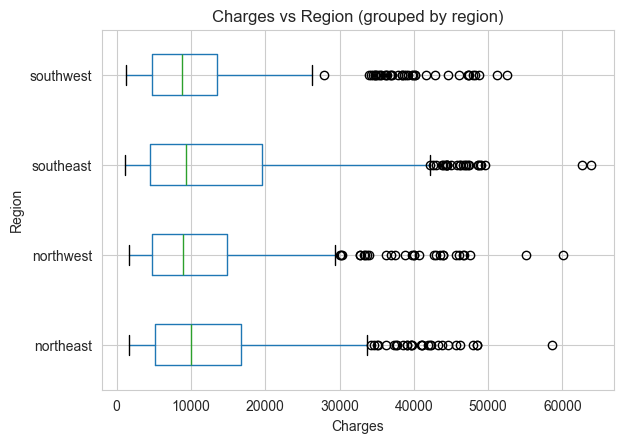

In [114]:
# Create a box plot for each unique value of 'region' versus 'charges'
main_df.boxplot(column='charges', by='region', vert=False)
plt.suptitle('') # Remove the default title
plt.title('Charges vs Region (grouped by region)')
plt.xlabel('Charges')
plt.ylabel('Region')
plt.show()

<a id='4.3.6.2-correlation-coefficient'></a>
#### Correlation Coefficient

In [115]:
# Determine the correlation between the charges and region variables
correlation = main_df['charges'].corr(main_df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}), method='spearman')
print(f'Correlation between charges and region: {round(correlation, 2)}')

Correlation between charges and region: 0.04


<a id='4.3.6.3-interpretation'></a>
#### Interpretation

The `region` variable has a fairly even distribution of values, with the `southeast` value having the highest mean value. The `southeast` value also has the highest number of outliers, which could indicate that the `southeast` value has a higher impact on the `charges` variable. The correlation of 0.04 indicates a very weak relationship between the two variables.

<a id='4.4-correlation-analysis'></a>
## Correlation Analysis

The correlation analysis will be done using a correlation matrix, later used to create a heatmap. The correlation matrix will be created the correlation `corr` function from Pandas, using the `main_df`.

<a id='4.4.1-correlation-matrix'></a>
#### Correlation Matrix

In [116]:
# Map all the categorical variables
for variable in categorical_fields:
    variable_map = {value: n for n, value in enumerate(main_df[variable].unique())}
    main_df[variable] = main_df[variable].map(variable_map)

# Create the correlation matrix
correlation_matrix = main_df.corr()

# Display the correlation matrix
print(correlation_matrix)

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.019814  0.109344  0.041536  0.025587 -0.001626  0.298308
sex      -0.019814  1.000000  0.046397  0.017848 -0.076596 -0.004936  0.058044
bmi       0.109344  0.046397  1.000000  0.012755 -0.003746 -0.157574  0.198401
children  0.041536  0.017848  0.012755  1.000000 -0.007331 -0.016258  0.067389
smoker    0.025587 -0.076596 -0.003746 -0.007331  1.000000 -0.002358 -0.787234
region   -0.001626 -0.004936 -0.157574 -0.016258 -0.002358  1.000000  0.006547
charges   0.298308  0.058044  0.198401  0.067389 -0.787234  0.006547  1.000000


<a id='4.4.2-heatmap'></a>
#### Heatmap

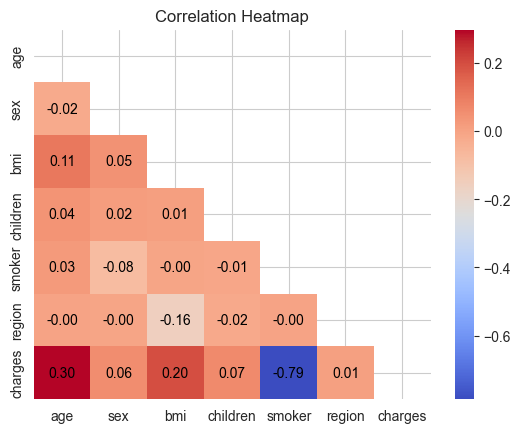

In [117]:
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', mask=mask)

# Manually create annotations
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        
        # Add if it's not in the mask
        if not mask[i, j]:
            plt.text(j + 0.5, i + 0.5, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                     ha='center', va='center', fontsize=10, color='black')
            
# Set the title
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

<a id='4.5-summary-of-exploratory-data-analysis-findings'></a>
## Summary of Exploratory Data Analysis Findings

The following table summarizes the findings of the bivariate analysis and the correlation analysis:

| Variable   | Relationship                | Correlation coefficient | Correlation matrix coefficient | Strength of relationship |
|------------|-----------------------------|-------------------------|--------------------------------|--------------------------|
| `age`      | `charges` versus `age`      | 0.3                     | 0.30                           | Weak                     |
| `bmi`      | `charges` versus `bmi`      | 0.2                     | 0.20                           | Weak                     |
| `children` | `charges` versus `children` | 0.07                    | 0.07                           | Very weak                |
| `sex`      | `charges` versus `sex`      | 0.01                    | 0.06                           | Very weak                |
| `smoker`   | `charges` versus `smoker`   | 0.66                    | -0.79                          | Strong                   |
| `region`   | `charges` versus `region`   | 0.04                    | 0.01                           | Very weak                |

The `smoker` variable has the strongest relationship with the `charges` variable, followed by the `age` and `bmi` variables. The `children`, `sex`, and `region` variables have a very weak relationship with the `charges` variable. This means that the `smoker` variable is the best indicator of the `charges` variable, followed by the `age` and `bmi` variables. The `children`, `sex`, and `region` variables are not good indicators of the `charges` variable.

<a id='5-hypotheses'></a>
# Hypotheses

This section will define the hypotheses which will run through the project.
The hypotheses will be tested using the `charges` variable, which is the one that will be predicted.

<a id='5.1-global-null-hypothesis'></a>
## Global Hypothesis

<a id='5.1.1-global-null-hypothesis'></a>
### Null Hypothesis
- $H_0$: `age`, `BMI`, `children`, `sex`, `smoker`, and `region` have no effect on medical charges.
- $H_0$: $\beta_1 = \beta_2 = \beta_3 = \beta_4 = \beta_5 = \beta_6 = 0$

<a id='5.1.2-global-alternative-hypothesis'></a>
### Alternative Hypothesis
- $H_{\alpha}$: At least one of the variables (`age`, `BMI`, `children`, `sex`, `smoker`, and `region`) has an effect on medical charges.
- $H_{\alpha}$: $\beta_1 \neq 0$ or $\beta_2 \neq 0$ or $\beta_3 \neq 0$ or $\beta_4 \neq 0$ or $\beta_5 \neq 0$ or $\beta_6 \neq 0$

<a id='5.1.3-global-importance'></a>
### Importance
This hypothesis will help identify which variables have an impact on the `charges` variable.

<a id='5.2-anova-hypothesis'></a>
## ANOVA Hypothesis

<a id='5.2.1-anova-null-hypothesis'></a>
### Null Hypothesis
For categorical variables, `sex`, `smoker`, and `region`:
- $H_0$: The mean of the `charges` variable for each category (`sex`, `smoker`, `region`) is the same.
- $H_0$: $\mu_{\text{sex}} = \mu_{\text{smoker}} = \mu_{\text{region}}$

<a id='5.2.2-anova-alternative-hypothesis'></a>
### Alternative Hypothesis
- $H_a$: The mean of the `charges` variable is not the same across all categories (`sex`, `smoker`, `region`).
- $H_a$: $\mu_{\text{sex}} \neq \mu_{\text{smoker}}$ or $\mu_{\text{smoker}} \neq \mu_{\text{region}}$ or $\mu_{\text{region}} \neq \mu_{\text{sex}}$

<a id='5.2.3-anova-importance'></a>
### Importance
This hypothesis will provide a greater insight on the value of the `sex`, `smoker`, and `region` variables. This will help determine if these variables should be included in the model or not during the feature selection process.

<a id='5.3-interaction-effect-hypothesis'></a>
## Interaction Effect Hypothesis

<a id='5.3.1-interaction-effect-null-hypothesis'></a>
### Null Hypothesis
- $H_0$: There is no interaction effect between `age`, `BMI` and `smoker` on `charges`.
- $H_0$: $\beta_{\text{interaction}} = 0$

<a id='5.3.2-interaction-effect-alternative-hypothesis'></a>
### Alternative Hypothesis
- $H_a$: There is an interaction effect between `age`, `BMI` and `smoker` on `charges`.
- $H_a$: $\beta_{\text{interaction}} \neq 0$

<a id='5.3.3-interaction-effect-importance'></a>
### Importance
Finding if there is a relation between the higher correlation variables (`age`, `BMI`, and `smoker`) will help determine if the model should include an interaction term or not. Furthermore, this could improve the global hypothesis and help determine if the model should include the `age`, `BMI`, and `smoker` variables or not.

<a id='5.4-subset-selection-hypothesis'></a>
### Subset Selection Hypothesis
These are additional hypotheses that will be tested to further improve the previous hypotheses. 

<a id='5.4.1-subset-selection-null-hypothesis-age'></a>
### Null Hypothesis for age groups
- $H_0$: The mean of the `charges` variable is the same across all age groups (Young, Middle-aged, Senior).
- $H_0$: $\mu_{\text{young}} = \mu_{\text{middle-aged}} = \mu_{\text{senior}}$

<a id='5.4.2-subset-selection-alternative-hypothesis-age'></a>
### Alternative Hypothesis for age groups
- $H_a$: The mean of the `charges` variable is not the same across all age groups (Young, Middle-aged, Senior).
- $H_a$: $\mu_{\text{young}} \neq \mu_{\text{middle-aged}}$ or $\mu_{\text{middle-aged}} \neq \mu_{\text{senior}}$ or $\mu_{\text{senior}} \neq \mu_{\text{young}}$

<a id='5.4.3-subset-selection-null-hypothesis-bmi'></a>
### Null Hypothesis for BMI categories
- $H_0$: The mean of the `charges` variable is the same across all BMI categories (Underweight, Normal, Overweight, Obese).
- $H_0$: $\mu_{\text{underweight}} = \mu_{\text{normal}} = \mu_{\text{overweight}} = \mu_{\text{obese}}$

<a id='5.4.4-subset-selection-alternative-hypothesis-bmi'></a>
### Alternative Hypothesis for BMI categories
- $H_a$: The mean of the `charges` variable is not the same across all BMI categories (Underweight, Normal, Overweight, Obese).
- $H_a$: $\mu_{\text{underweight}} \neq \mu_{\text{normal}}$ or $\mu_{\text{normal}} \neq \mu_{\text{overweight}}$ or $\mu_{\text{overweight}} \neq \mu_{\text{obese}}$ or $\mu_{\text{obese}} \neq \mu_{\text{underweight}}$

# Statistical Analysis

#TODO: Significance level
#TODO: p-value interpretation
#TODO: Results and conclusions


# Feature Engineering

In [118]:
# TODO: Feature creation
# TODO: Feature scaling
# TODO: Dimensionality reduction (PCA if applicable)


# Model Building

In [119]:
# TODO: Model selection criteria
# TODO: Train-test split
# TODO: Model training
# TODO: Hyperparameter tuning


# Model Evaluation

In [120]:
# TODO: Evaluation metrics
# TODO: Cross-validation
# TODO: Model comparison


# Interpretation and Insights

In [121]:
# TODO: Feature importance
# TODO: Business or real-world applications
# TODO: Limitations


# Conclusion

In [122]:
# TODO: Project summary
# TODO Future work


# Appendices

In [123]:
# TODO: Code
# TODO: Additional graphs and charts